In [60]:
import pandas as pd

df = pd.read_csv('penjualan_umkm_fiktif.csv')

print(df.head())
print(df.info())
print(df.describe(include='all'))


      Tanggal       Produk Kategori  Jumlah Terjual  Harga Satuan   Total  \
0  2025-04-08    Teh Tarik  Minuman               4         12000   48000   
1  2025-04-02   Kopi Hitam  Minuman               1         13000   13000   
2  2025-04-10  Susu Almond  Minuman               6         18000  108000   
3  2025-04-26   Roti Tawar  Makanan               6          7000   42000   
4  2025-04-08     Brownies  Makanan               3         20000   60000   

       Kota  
0  Surabaya  
1   Jakarta  
2   Jakarta  
3     Medan  
4     Medan  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         100 non-null    object
 1   Produk          100 non-null    object
 2   Kategori        100 non-null    object
 3   Jumlah Terjual  100 non-null    int64 
 4   Harga Satuan    100 non-null    int64 
 5   Total           100 non-null    int64

In [2]:
produk_terlaris = df.groupby('Produk')['Jumlah Terjual'].sum().sort_values(ascending=False)
print(produk_terlaris)

Produk
Susu Almond    103
Roti Tawar      82
Brownies        71
Kopi Hitam      69
Teh Tarik       64
Donat Keju      63
Kopi Susu       45
Roti Coklat     39
Name: Jumlah Terjual, dtype: int64


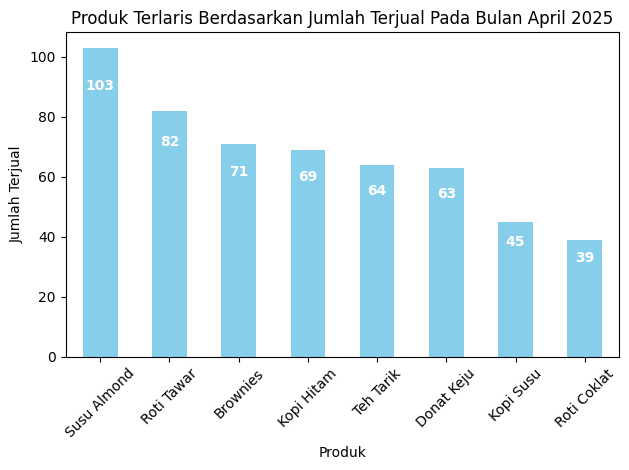

In [24]:
import matplotlib.pyplot as plt

produk_terlaris.plot(kind='bar', color='skyblue')
plt.title('Produk Terlaris Berdasarkan Jumlah Terjual Pada Bulan April 2025')
plt.xlabel('Produk')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=45)

for i, value in enumerate(produk_terlaris):
    plt.text(i, value * 0.9, str(value), ha='center', va='top', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [30]:
kota_terbaik = df.groupby('Kota')['Total'].sum().sort_values(ascending=True)
print(kota_terbaik)



Kota
Medan         1117000
Jakarta       1225000
Bandung       1507000
Yogyakarta    1591000
Surabaya      1642000
Name: Total, dtype: int64


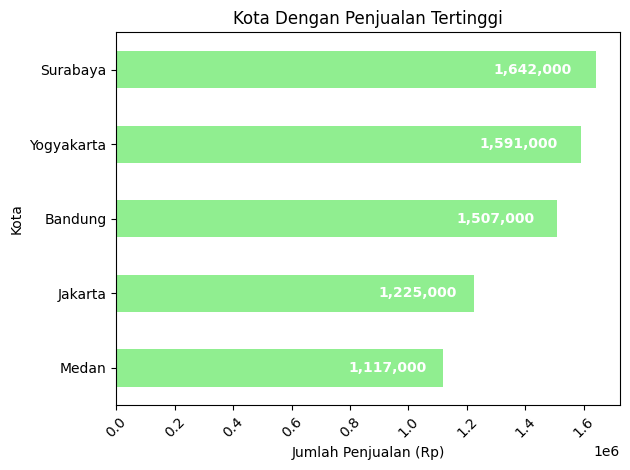

In [33]:
kota_terbaik.plot(kind='barh', color='lightgreen')
plt.title('Kota Dengan Penjualan Tertinggi')
plt.xlabel('Jumlah Penjualan (Rp)')
plt.ylabel('Kota')
plt.xticks(rotation=45)

for i, value in enumerate(kota_terbaik):
    plt.text(value * 0.95, i, f'{int(value):,}', va='center', ha='right', color='white', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [65]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

penjualan_harian = df.groupby('Tanggal')['Total'].sum()
penjualan_mingguan = df.resample('W', on='Tanggal')['Total'].sum()

print(penjualan_harian)
print(penjualan_mingguan)

Tanggal
2025-04-01    314000
2025-04-02     20000
2025-04-03    170000
2025-04-04    162000
2025-04-05    390000
2025-04-06    171000
2025-04-08    204000
2025-04-09    291000
2025-04-10    211000
2025-04-11    438000
2025-04-12    420000
2025-04-13    239000
2025-04-14    162000
2025-04-15    265000
2025-04-16    175000
2025-04-17    337000
2025-04-18    199000
2025-04-19    189000
2025-04-20    330000
2025-04-21     90000
2025-04-22    304000
2025-04-23    298000
2025-04-24     88000
2025-04-25    156000
2025-04-26    554000
2025-04-27    126000
2025-04-28    200000
2025-04-29    359000
2025-04-30    220000
Name: Total, dtype: int64
Tanggal
2025-04-06    1227000
2025-04-13    1803000
2025-04-20    1657000
2025-04-27    1616000
2025-05-04     779000
Freq: W-SUN, Name: Total, dtype: int64


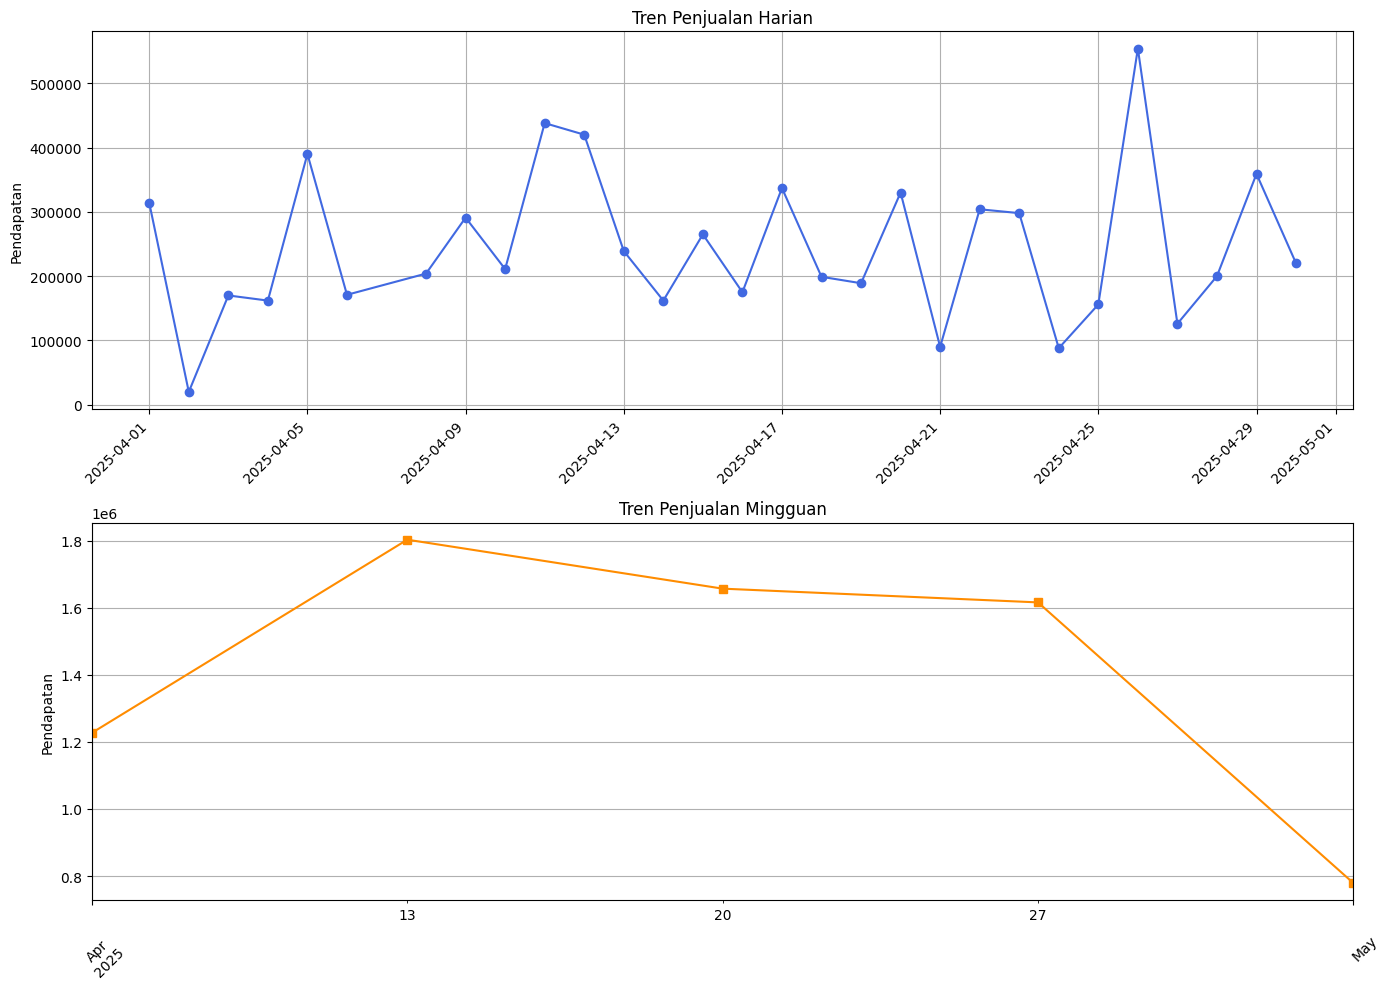

In [66]:

plt.figure(figsize=(14, 10))

# Grafik Harian
plt.subplot(2, 1, 1)
penjualan_harian.plot(marker='o', color='royalblue')
plt.title('Tren Penjualan Harian')
plt.xlabel('')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.xticks(rotation=45)

# Grafik Mingguan
plt.subplot(2, 1, 2)
penjualan_mingguan.plot(marker='s', color='darkorange')
plt.title('Tren Penjualan Mingguan')
plt.xlabel('')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [70]:
rata_rata_harga = df.groupby('Produk')['Harga Satuan'].mean().sort_values(ascending=True)
print(rata_rata_harga)

Produk
Roti Tawar      7000.0
Donat Keju      8000.0
Roti Coklat    10000.0
Teh Tarik      12000.0
Kopi Hitam     13000.0
Kopi Susu      15000.0
Susu Almond    18000.0
Brownies       20000.0
Name: Harga Satuan, dtype: float64


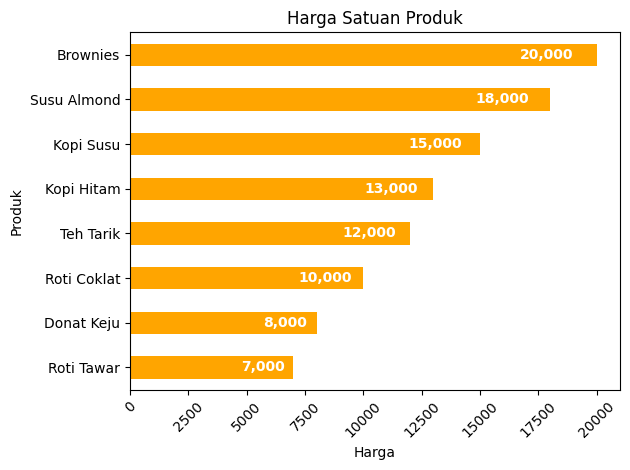

In [72]:
rata_rata_harga.plot(kind='barh', color='orange')
plt.title('Harga Satuan Produk')
plt.xlabel('Harga')
plt.ylabel('Produk')
plt.xticks(rotation=45)

for i, value in enumerate(rata_rata_harga):
    plt.text(value * 0.95, i, f'{int(value):,}', va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

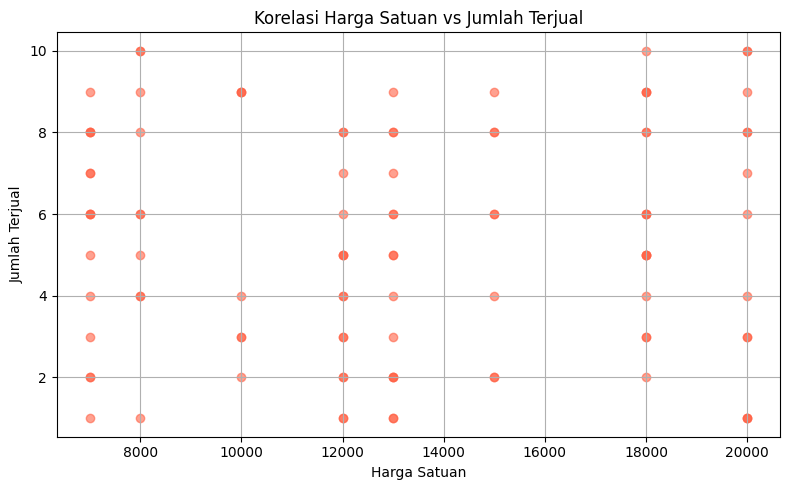

In [74]:
plt.figure(figsize=(8,5))
plt.scatter(df['Harga Satuan'], df['Jumlah Terjual'], alpha=0.6, color='tomato')
plt.title('Korelasi Harga Satuan vs Jumlah Terjual')
plt.xlabel('Harga Satuan')
plt.ylabel('Jumlah Terjual')
plt.grid(True)
plt.tight_layout()
plt.show()
